In [3]:
import pyupbit
from pyupbit.quotation_api import get_tickers
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, GRU, LSTM
from tensorflow.keras.optimizers import RMSprop, Nadam, Adam
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import os

In [2]:
!pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 55.6 MB/s 


In [4]:
#데이터 불러오기

df_ETH = pyupbit.get_ohlcv("KRW-ETH","hour",1581, to = '20220501')
df_ETH = df_ETH.drop("value",axis=1)
print(df_ETH)


df_BTC = pyupbit.get_ohlcv("KRW-BTC","hour",1581, to = '20220501')
df_BTC= df_BTC.drop("value",axis=1)
print(df_BTC)


df_ETC = pyupbit.get_ohlcv("KRW-ETC","hour",1581, to = '20220501')
df_ETC = df_ETC.drop("value",axis=1)
print(df_ETC)

df_XRP = pyupbit.get_ohlcv("KRW-XRP","hour",1581, to = '20220501')
df_XRP = df_XRP.drop("value",axis=1)
print(df_XRP)

df_BTG = pyupbit.get_ohlcv("KRW-BTG","hour",1581, to = '20220501')
df_BTG = df_BTG.drop("value",axis=1)
print(df_BTG)

df_QTUM = pyupbit.get_ohlcv("KRW-QTUM","hour",1581, to = '20220501')
df_QTUM = df_QTUM.drop("value",axis=1)
print(df_QTUM)

                          open       high        low      close         volume
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0   51315.571156
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0  158481.289301
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0   83430.944304
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0   97018.955981
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0  109665.854669
...                        ...        ...        ...        ...            ...
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0   39317.760548
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0   24282.807473
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0   26791.875509
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0   26801.567048
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0   17625.435214

[1581 rows x 5 columns]
                           

In [ ]:
def minmax(x):
    sc = MinMaxScaler()
    y = sc.fit_transform(x)
    return y

df_ETH = minmax(df_ETH)
df_BTC = minmax(df_BTC)
df_ETC = minmax(df_ETC)
df_XRP = minmax(df_XRP)
df_BTG = minmax(df_BTG)
df_QTUM = minmax(df_QTUM)


def split(x):
    y = pd.DataFrame(x)
    a = int(len(y)*0.8)
    y1 = y.iloc[:a,:5].values
    y2 = y.iloc[a:,:5].values
    return y1,y2                
            
ETH_train,ETH_test = split(df_ETH)
BTC_train,BTC_test = split(df_BTC)
ETC_train,ETC_test = split(df_ETC)
XRP_train,XRP_test = split(df_XRP)    
BTG_train,BTG_test = split(df_BTG)
QTUM_train,QTUM_test = split(df_QTUM)
            
def inputsize(df_train,df_test):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    for i in range(3,len(df_train)+1):
        x_train.append(df_train[i-3:i,:])
        y_train.append(df_train[i-1,3])
    
    x_train, y_train = np.array(x_train), np.array(y_train)
    
    for i in range(3,len(df_test)+1):
        x_test.append(df_test[i-3:i,:])
        y_test.append(df_test[i-1,3])
        
    x_test, y_test = np.array(x_test), np.array(y_test) 
    
    return x_train, y_train, x_test, y_test

ETH_x_train, ETH_y_train, ETH_x_test, ETH_y_test = inputsize(ETH_train,ETH_test)
BTC_x_train, BTC_y_train, BTC_x_test, BTC_y_test = inputsize(BTC_train,BTC_test)
ETC_x_train, ETC_y_train, ETC_x_test, ETC_y_test = inputsize(ETC_train,ETC_test)
XRP_x_train, XRP_y_train, XRP_x_test, XRP_y_test = inputsize(XRP_train,XRP_test)
BTG_x_train, BTG_y_train, BTG_x_test, BTG_y_test = inputsize(BTG_train,BTG_test)
QTUM_x_train, QTUM_y_train, QTUM_x_test, QTUM_y_test = inputsize(QTUM_train,QTUM_test)


In [ ]:
# 이더리움 학습
ETH_model = Sequential()

ETH_model.add(LSTM(units = 50,
            return_sequences = True,
            input_shape = (3,5),
            activation = 'tanh'))



ETH_model.add(LSTM(units = 50,
            activation = 'tanh'))

ETH_model.add(Dense(units = 1))

ETH_model.compile(optimizer = Adam(lr=0.01),
            loss = 'Huber')
ETH_model.fit(ETH_x_train,ETH_y_train, epochs = 200, batch_size = 32, verbose = 0)
ETH_prediction = ETH_model.predict(ETH_x_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


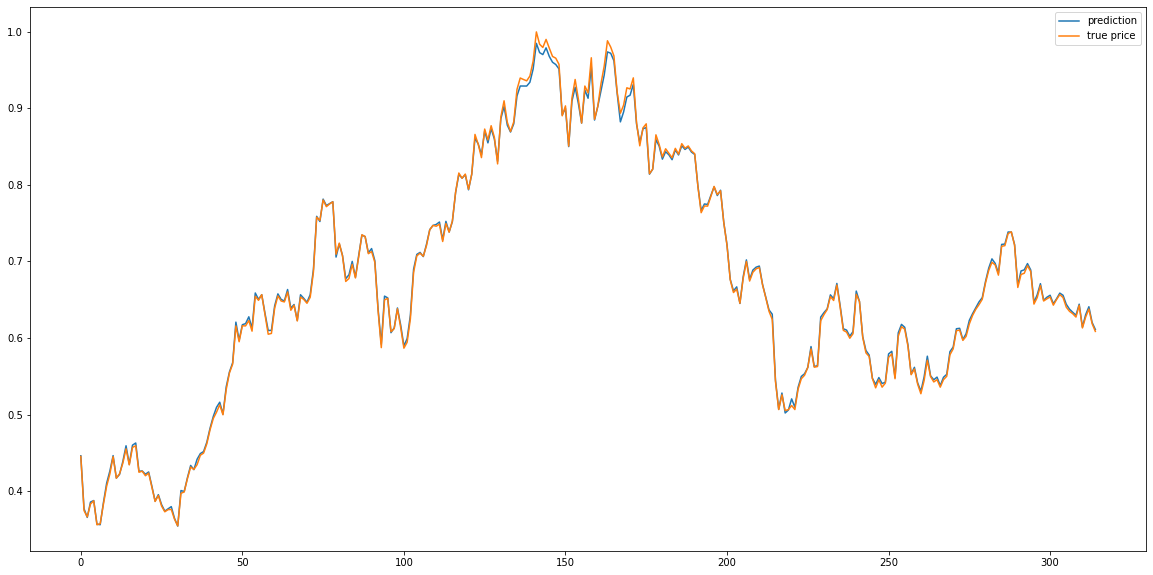

1.5052967352294766e-05


In [ ]:
# 이더리움 시각화

x1 = []
for i in range(315):
    x1.append(i)
    
plt.figure(figsize = (20,10))    
plt.plot(x1,ETH_prediction,label = 'prediction')
plt.plot(x1, ETH_y_test,label = 'true price')
plt.legend()
plt.show()

# MSE
ETH_MSE = mean_squared_error(ETH_prediction,ETH_y_test)
print(ETH_MSE)

In [ ]:
# 비트코인 학습
BTC_model = Sequential()
BTC_model.add(LSTM(units = 50,
            return_sequences = True,
            input_shape = (3,5),
            activation = 'tanh'))

BTC_model.add(LSTM(units = 50,
            activation = 'tanh'))

BTC_model.add(Dense(units = 1))

BTC_model.compile(optimizer = Adam(lr=0.01),
            loss = 'Huber')
BTC_model.fit(BTC_x_train,BTC_y_train, epochs = 200, batch_size = 32, verbose = 0)
BTC_prediction = BTC_model.predict(BTC_x_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


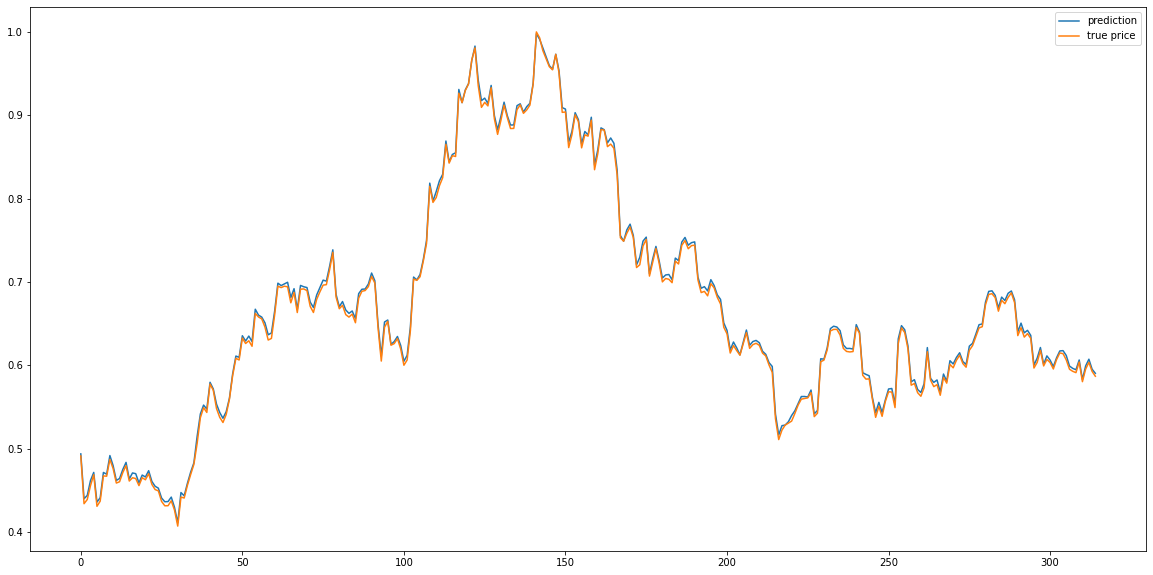

1.5829212250574366e-05


In [ ]:
# 비트코인 시각화

x1 = []
for i in range(315):
    x1.append(i)

plt.figure(figsize = (20,10))    
plt.plot(x1,BTC_prediction,label = 'prediction')
plt.plot(x1, BTC_y_test,label = 'true price')
plt.legend()
plt.show()

# MSE

BTC_MSE = mean_squared_error(BTC_prediction,BTC_y_test)
print(BTC_MSE)

In [ ]:
# 이더리움 클래식 학습
ETC_model = Sequential()
ETC_model.add(LSTM(units = 50,
            return_sequences = True,
            input_shape = (3,5),
            activation = 'tanh'))

ETC_model.add(LSTM(units = 50,
            activation = 'tanh'))

ETC_model.add(Dense(units = 1))

ETC_model.compile(optimizer = Adam(lr=0.01),
            loss = 'Huber')
ETC_model.fit(ETC_x_train,ETC_y_train, epochs = 200, batch_size = 32, verbose = 0)
ETC_prediction = ETC_model.predict(ETC_x_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


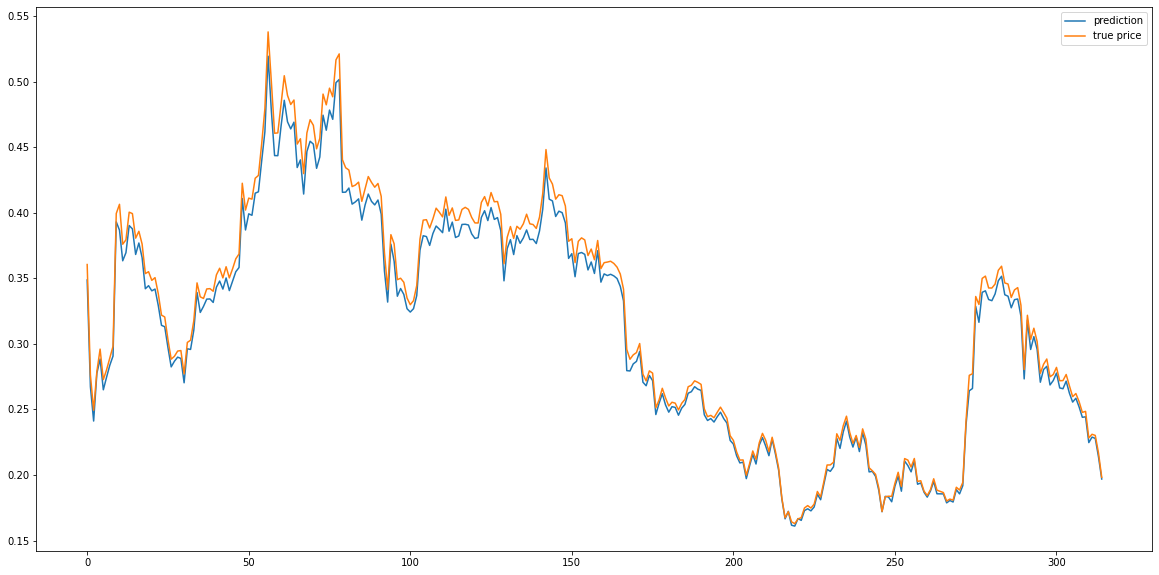

8.939199204587667e-05


In [ ]:
# 이더리움 클래식 시각화
x1 = []
for i in range(315):
    x1.append(i)

plt.figure(figsize = (20,10))   
plt.plot(x1,ETC_prediction,label = 'prediction')
plt.plot(x1, ETC_y_test,label = 'true price')
plt.legend()
plt.show()

# MSE

ETC_MSE = mean_squared_error(ETC_prediction,ETC_y_test)
print(ETC_MSE)

In [ ]:
# 리플 학습
XRP_model = Sequential()
XRP_model.add(LSTM(units = 50,
            return_sequences = True,
            input_shape = (3,5),
            activation = 'tanh'))


XRP_model.add(LSTM(units = 50,
            activation = 'tanh'))

XRP_model.add(Dense(units = 1))

XRP_model.compile(optimizer = Adam(lr=0.01),
            loss = 'Huber')
XRP_model.fit(XRP_x_train,XRP_y_train, epochs = 200, batch_size = 32, verbose = 0)
XRP_prediction = XRP_model.predict(XRP_x_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


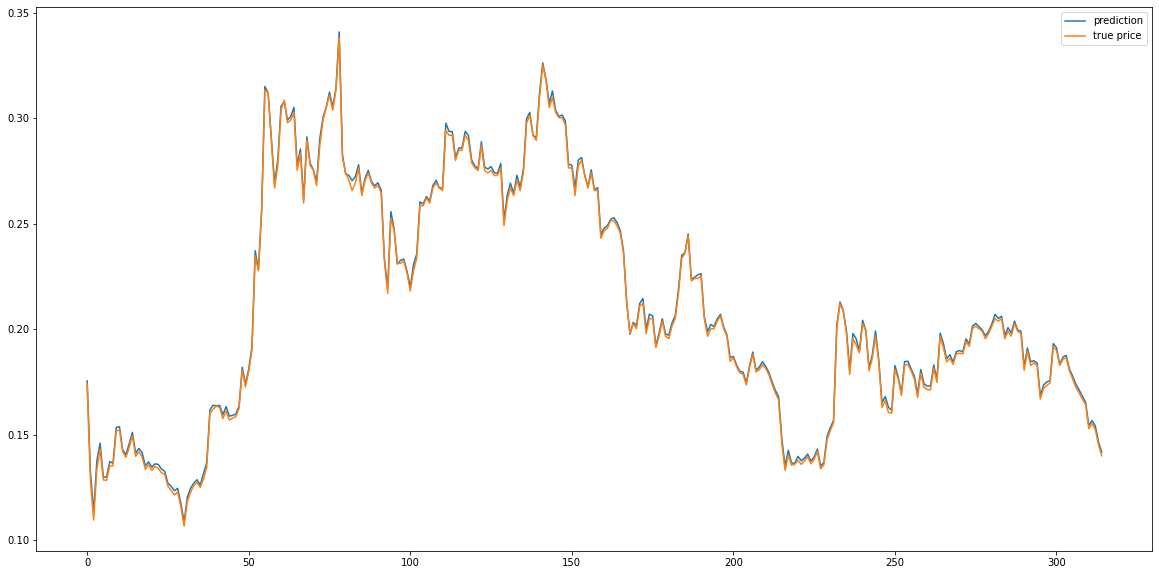

2.6086636015672246e-06


In [ ]:
# 리플 시각화
x1 = []
for i in range(315):
    x1.append(i)

plt.figure(figsize = (20,10)) 
plt.plot(x1,XRP_prediction,label = 'prediction')
plt.plot(x1, XRP_y_test,label = 'true price')
plt.legend()
plt.show()

# MSE

XRP_MSE = mean_squared_error(XRP_prediction,XRP_y_test)
print(XRP_MSE)

In [ ]:
# 비트코인 골드 학습
BTG_model = Sequential()
BTG_model.add(LSTM(units = 50,
            return_sequences = True,
            input_shape = (3,5),
            activation = 'tanh'))



BTG_model.add(LSTM(units = 50,
            activation = 'tanh'))

BTG_model.add(Dense(units = 1))

BTG_model.compile(optimizer = Adam(lr=0.01),
            loss = 'Huber')
BTG_model.fit(BTG_x_train,BTG_y_train, epochs = 200, batch_size = 32, verbose = 0)
BTG_prediction = BTG_model.predict(BTG_x_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


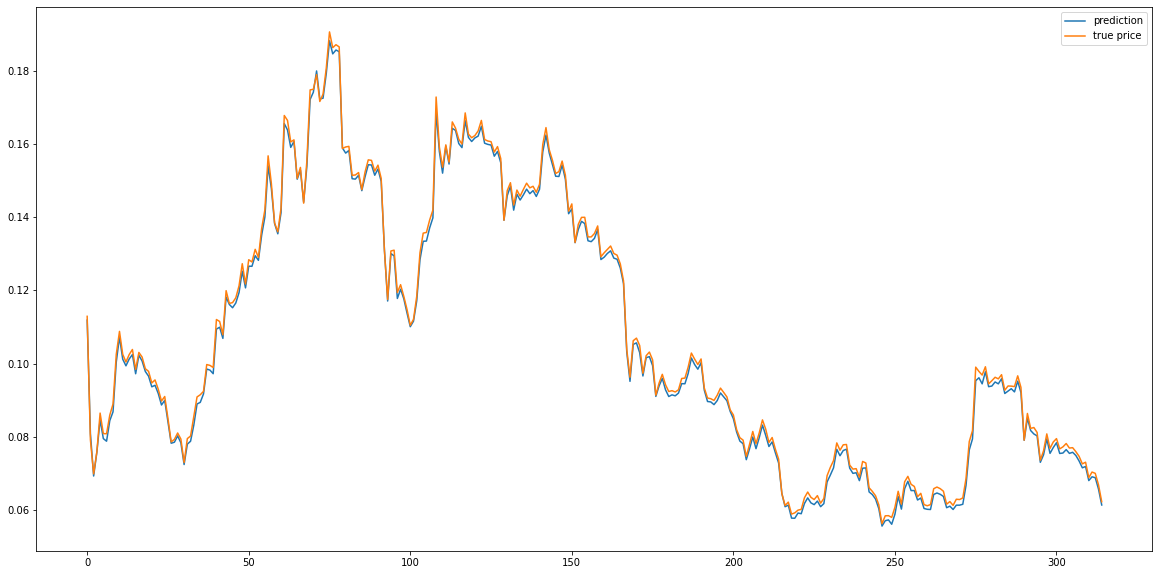

1.8543758845386873e-06


In [ ]:
# 비트코인 골드 시각화
x1 = []
for i in range(315):
    x1.append(i)

plt.figure(figsize = (20,10)) 
plt.plot(x1,BTG_prediction,label = 'prediction')
plt.plot(x1, BTG_y_test,label = 'true price')
plt.legend()
plt.show()

# MSE

BTG_MSE = mean_squared_error(BTG_prediction,BTG_y_test)
print(BTG_MSE)

In [ ]:
# 퀸텀 학습
QTUM_model = Sequential()
QTUM_model.add(LSTM(units = 50,
            return_sequences = True,
            input_shape = (3,5),
            activation = 'tanh'))

QTUM_model.add(LSTM(units = 50,
            activation = 'tanh'))


QTUM_model.add(Dense(units = 1))

QTUM_model.compile(optimizer = Adam(lr=0.01),
            loss = 'Huber')
QTUM_model.fit(QTUM_x_train,QTUM_y_train, epochs = 200, batch_size = 32, verbose = 0)
QTUM_prediction = QTUM_model.predict(QTUM_x_test)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


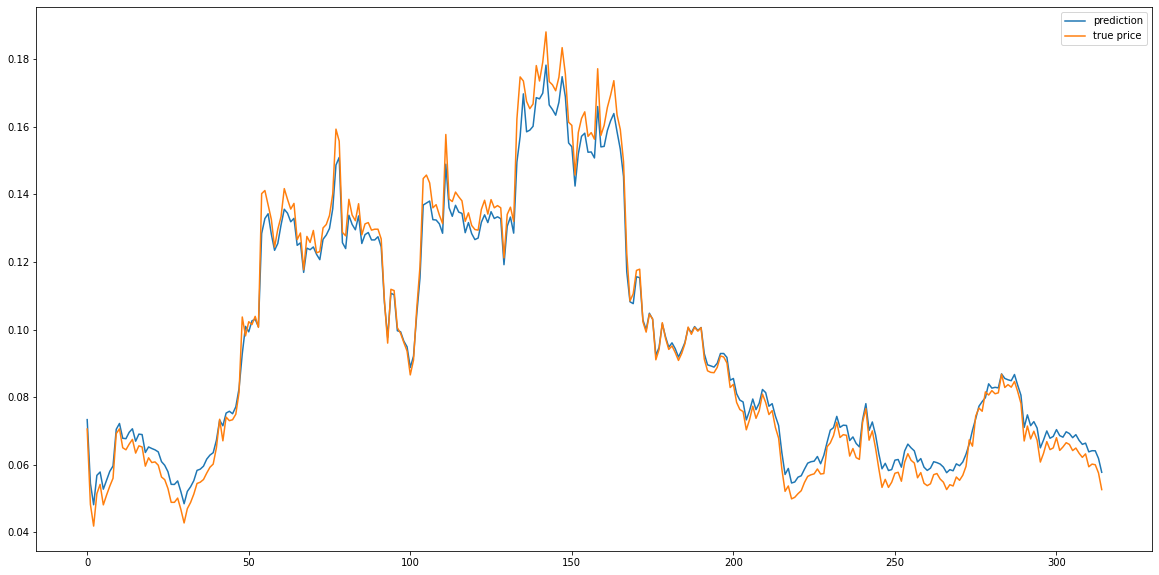

1.8157518978088137e-05


In [ ]:
# 퀸텀 시각화
x1 = []
for i in range(315):
    x1.append(i)

plt.figure(figsize = (20,10)) 
plt.plot(x1,QTUM_prediction,label = 'prediction')
plt.plot(x1, QTUM_y_test,label = 'true price')
plt.legend()
plt.show()

# MSE

QTUM_MSE = mean_squared_error(QTUM_prediction,QTUM_y_test)
print(QTUM_MSE)

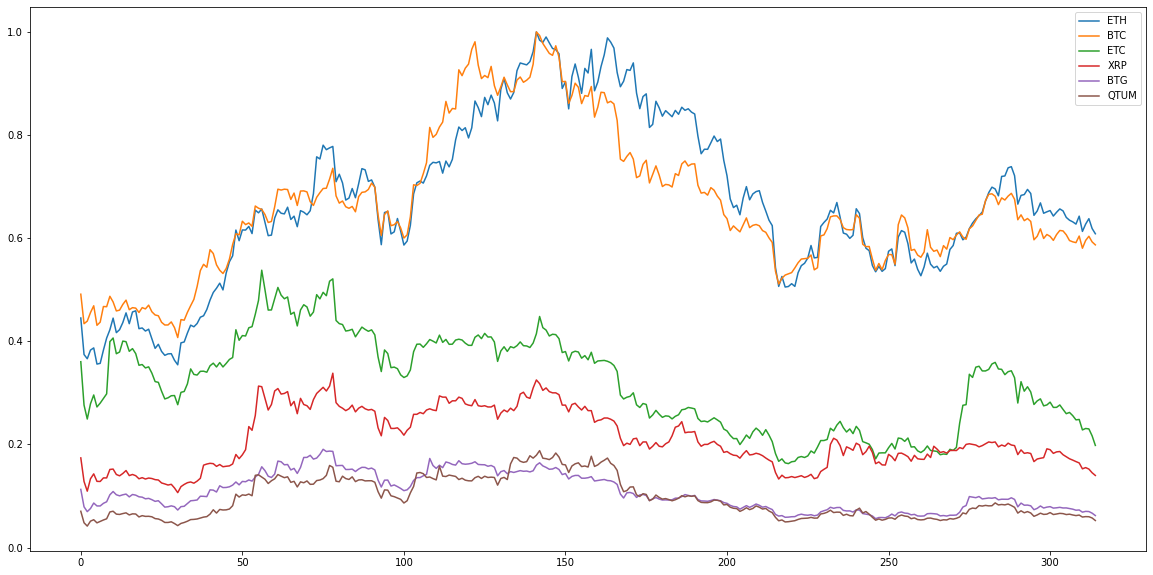

In [ ]:
x1 = []
for i in range(315):
    x1.append(i)
    
plt.figure(figsize = (20,10))    
plt.plot(x1, ETH_y_test,label = 'ETH')
plt.plot(x1, BTC_y_test,label = 'BTC')
plt.plot(x1, ETC_y_test,label = 'ETC')
plt.plot(x1, XRP_y_test,label = 'XRP')
plt.plot(x1, BTG_y_test,label = 'BTG')
plt.plot(x1, QTUM_y_test,label = 'QTUM')

plt.legend()
plt.show()

In [ ]:
# 솔루션
df_ETH = pyupbit.get_ohlcv("KRW-ETH","hour",3)
df_ETH = df_ETH.drop("value",axis=1)

df_BTC = pyupbit.get_ohlcv("KRW-BTC","hour",3)
df_BTC= df_BTC.drop("value",axis=1)

df_ETC = pyupbit.get_ohlcv("KRW-ETC","hour",3)
df_ETC = df_ETC.drop("value",axis=1)

df_XRP = pyupbit.get_ohlcv("KRW-XRP","hour",3)
df_XRP = df_XRP.drop("value",axis=1)

df_BTG = pyupbit.get_ohlcv("KRW-BTG","hour",3)
df_BTG = df_BTG.drop("value",axis=1)

df_QTUM = pyupbit.get_ohlcv("KRW-QTUM","hour",3)
df_QTUM = df_QTUM.drop("value",axis=1)


In [ ]:
df_ETH = df_ETH.to_numpy()
df_BTC = df_BTC.to_numpy()
df_ETC = df_ETC.to_numpy()
df_XRP = df_XRP.to_numpy()
df_BTG = df_BTG.to_numpy()
df_QTUM = df_QTUM.to_numpy()

In [ ]:
df_ETH = df_ETH.reshape(1,3,5)
df_BTC = df_BTC.reshape(1,3,5)
df_ETC = df_ETC.reshape(1,3,5)
df_XRP = df_XRP.reshape(1,3,5)
df_BTG = df_BTG.reshape(1,3,5)
df_QTUM = df_QTUM.reshape(1,3,5)

ETH_prediction = ETH_model.predict(df_ETH)
BTC_prediction = BTC_model.predict(df_BTC)
ETC_prediction = ETC_model.predict(df_ETC)
XRP_prediction = XRP_model.predict(df_XRP)
BTG_prediction = BTG_model.predict(df_BTG)
QTUM_prediction = QTUM_model.predict(df_QTUM)


In [ ]:
# 현재가
ETH_current = pyupbit.get_current_price("KRW-ETH")
BTC_current = pyupbit.get_current_price("KRW-BTC")
ETC_current = pyupbit.get_current_price("KRW-ETC")
XRP_current = pyupbit.get_current_price("KRW-XRP")
BTG_current = pyupbit.get_current_price("KRW-BTG")
QTUM_current = pyupbit.get_current_price("KRW-QTUM")

In [ ]:
ETH_rate = (ETH_prediction - ETH_current)/ETH_current
BTC_rate = (BTC_prediction - BTC_current)/BTC_current
ETC_rate = (ETC_prediction - ETC_current)/ETC_current
XRP_rate = (XRP_prediction - XRP_current)/XRP_current
BTG_rate = (BTG_prediction - BTG_current)/BTG_current
QTUM_rate = (QTUM_prediction - QTUM_current)/QTUM_current

coin = ["KRW-ETH","KRW-BTC","KRW-ETC","KRW-XRP","KRW-BTG","KRW-QTUM"]

rate_list = [ETH_rate,BTC_rate,ETC_rate,XRP_rate,BTG_rate,QTUM_rate]
plus_index = []
plus_list = []
plus_coin =[]

for i in plus_index:
    plus_coin.append(coin[i])
for i in range(6):
    if rate_list[i] > 0:
        plus_index.append(i)
        plus_list.append(rate_list[i])

access = ""
secret = ""
upbit = pyupbit.Upbit(access, secret)
warning = "솔루션 제공 불가"

In [ ]:
# 솔루션 high risk

def highrisk(rate_list,coin):
    a = np.max(rate_list)

    if a > 0:
        return coin[rate_list.index(a)]
    else:
        return warning

In [ ]:
# 솔루션 high risk 매수
n = "10000000000"
upbit.buy_limit_order("highrisk(rate_list,coin)",n, 1)

NameError: ignored

In [ ]:
# 솔루션 row risk

def rowrisk(plus_list):
    if plus_list != []:
        a = []
        for i in range(len(plus_list)):
            a.append(plus_list[i]/np.sum(plus_list))
        
        return a
    else:
        return warning


In [ ]:
# 솔루션 row risk 매수
n = "1000000000"
for i in range(len(plus_list)):
    upbit.buy_limit_order("plus_coin[i]",n*rowrisk(plus_risk)[i], 1)


In [ ]:
# 솔루션 알람
만약 수익률이 일정 값 이하 코인이 솔루션에 포함되어 있으면
사용자에게 알람 

In [ ]:
# 